# CTS

Import thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
# 2. Đọc file csv và gắng index với giá Close
df1= pd.read_csv('DataCTS.csv')
df_CTS=df1.reset_index()['Price']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_CTS=scaler.fit_transform(np.array(df_CTS).reshape(-1,1))

In [ ]:
df_CTS

array([[0.06680277],
       [0.0638417 ],
       [0.06022094],
       ...,
       [0.99125422],
       [0.96626628],
       [0.96626628]])

In [ ]:
# 4. Chia train test
train_size = int(len(df_CTS) * 0.6)
test_size = len(df_CTS) - train_size
train_data, test_data = df_CTS[0:train_size, :], df_CTS[train_size:len(df_CTS), :1]


In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 9s 163ms/step - loss: 0.0248
Epoch 2/100
17/17 [==============================] - 3s 163ms/step - loss: 0.0035
Epoch 3/100
17/17 [==============================] - 3s 159ms/step - loss: 0.0017
Epoch 4/100
17/17 [==============================] - 4s 221ms/step - loss: 0.0014
Epoch 5/100
17/17 [==============================] - 3s 186ms/step - loss: 0.0013
Epoch 6/100
17/17 [==============================] - 3s 159ms/step - loss: 0.0013
Epoch 7/100
17/17 [==============================] - 3s 158ms/step - loss: 0.0014
Epoch 8/100
17/17 [==============================] - 4s 209ms/step - loss: 0.0012
Epoch 9/100
17/17 [==============================] - 4s 237ms/step - loss: 0.0011
Epoch 10/100
17/17 [==============================] - 3s 157ms/step - loss: 0.0010
Epoch 11/100
17/17 [==============================] - 3s 159ms/step - loss: 9.9338e-04
Epoch 12/100
17/17 [==============================] - 3s 159ms/step - loss: 9.8005e-04
Epoch

In [ ]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

22/22 [==============================] - 1s 35ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

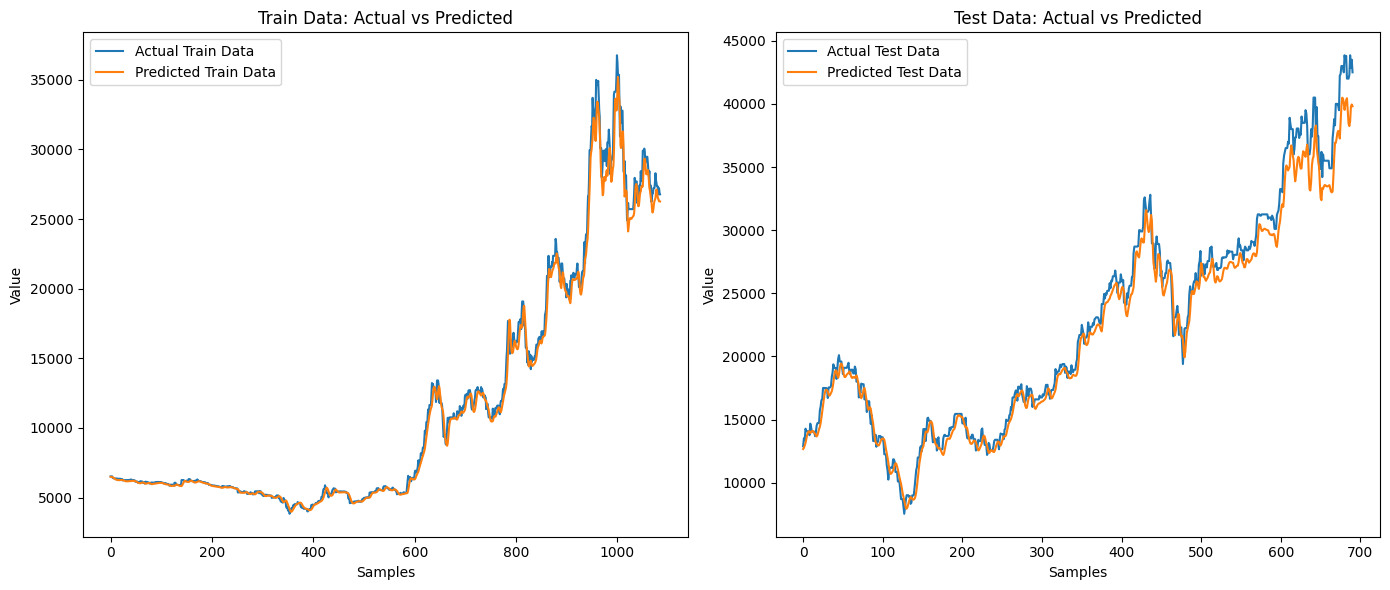

In [ ]:
# Vẽ giá trị dự đoán và giá trị thực tế cho tập kiểm tra
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train_actual, label='Actual Train Data')
plt.plot(train_predict, label='Predicted Train Data')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label='Actual Test Data')
plt.plot(y_pred, label='Predicted Test Data')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test_actual)**2))
print('Testing RMSE:', test_rmse)

mape = mean_absolute_percentage_error(y_test_actual, y_pred)
print(f'Testing MAPE: {mape}')

mae = mean_absolute_error(y_test_actual, y_pred)
print(f'Testing MAE: {mae}')

Testing RMSE: 1308.0334827033703
Testing MAPE: 0.04206665429939477
Testing MAE: 989.9212995206224


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_30_days=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_30_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_30_days.extend(yhat.tolist())
        i=i+1

0 day input [0.33071793 0.32574783 0.32574783 0.32574783 0.32177224 0.30785646
 0.32375879 0.32872889 0.30586742 0.30586742 0.30586742 0.27803335
 0.2561664  0.23230791 0.21441654 0.19354162 0.19354162 0.19354162
 0.17366121 0.17465573 0.19354162 0.1925471  0.19851172 0.19851172
 0.19851172 0.21839213 0.22236771 0.22932685 0.2074574  0.22236771
 0.22236771 0.22236771 0.23628599 0.22932685 0.2124275  0.2074574
 0.22634579 0.22634579 0.22634579 0.22634579 0.24224812 0.23827253
 0.2611365  0.2561664  0.2561664  0.2561664  0.25517188 0.24821274
 0.27107671 0.26411756 0.25517188 0.25517188 0.25517188 0.25517188
 0.2462262  0.25417736 0.26710112 0.27207123 0.27207123 0.27207123
 0.29692174 0.3048729  0.31779666 0.31878868 0.34165265 0.34165265
 0.34165265 0.33966361 0.34165265 0.33966361 0.32177224 0.34264717
 0.34264717 0.34264717 0.34562823 0.3635221  0.37246778 0.38837261
 0.38141347 0.38141347 0.38141347 0.35954402 0.38141347 0.39903996
 0.40653635 0.39404237 0.39404237 0.39404237 0.3815

In [ ]:
#14. Dự đoán 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60_days=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60_days.extend(yhat.tolist())
        i=i+1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 0.21912677 0.22537376 0.23661833 0.23911713 0.23911713 0.23911713
 0.23911713 0.23162074 0.22037617 0.24161592 0.2516111  0.2503617
 0.2503617  0.2503617  0.24036652 0.25910748 0.26160627 0.27909784
 0.27659904 0.27659904 0.27659904 0.28784362 0.28909301 0.30408578
 0.29908819 0.32282674 0.32282674 0.32282674 0.33157252 0.3365701
 0.3365701  0.31657975 0.34406649 0.34406649 0.34406649 0.3390689
 0.34906408 0.32907372 0.32157734 0.31408096 0.31408096 0.31408096
 0.32032794 0.34531589 0.33407131 0.32532553 0.3403183  0.3403183
 0.3403183  0.33407131 0.30408578 0.31408096 0.31033276 0.31907854
 0.31907854 0.31907854 0.31907854 0.31907854 0.31907854 0.32657493
 0.32282674 0.32282674 0.32282674 0.32907372 0.32657493 0.32907372
 0.3378195  0.34781468 0.34781468 0.34781468 0.32907372 0.3365701
 0.32032794 0.33282191 0.3378195  0.3378195  0.3378195  0.34531589
 0.35156287 0.37904961 0.36905443 0.37405202 0.37405202 0.37405202
 0.3802990

In [ ]:
#14. Dự đoán 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90_days=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90_days.extend(yhat.tolist())
        i=i+1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 0.3365701  0.31657975 0.34406649 0.34406649 0.34406649 0.3390689
 0.34906408 0.32907372 0.32157734 0.31408096 0.31408096 0.31408096
 0.32032794 0.34531589 0.33407131 0.32532553 0.3403183  0.3403183
 0.3403183  0.33407131 0.30408578 0.31408096 0.31033276 0.31907854
 0.31907854 0.31907854 0.31907854 0.31907854 0.31907854 0.32657493
 0.32282674 0.32282674 0.32282674 0.32907372 0.32657493 0.32907372
 0.3378195  0.34781468 0.34781468 0.34781468 0.32907372 0.3365701
 0.32032794 0.33282191 0.3378195  0.3378195  0.3378195  0.34531589
 0.35156287 0.37904961 0.36905443 0.37405202 0.37405202 0.37405202
 0.38029901 0.38779539 0.3827978  0.38779539 0.38904479 0.38904479
 0.38904479 0.37155323 0.3840472  0.3815484  0.36155805 0.37405202
 0.37405202 0.37405202 0.36905443 0.38654599 0.37655081 0.37280262
 0.37780021 0.37780021 0.37780021 0.39154358 0.39903996 0.43277369
 0.43902067 0.44651706 0.44651706 0.44651706 0.46650741 0.45776163
 0.45026

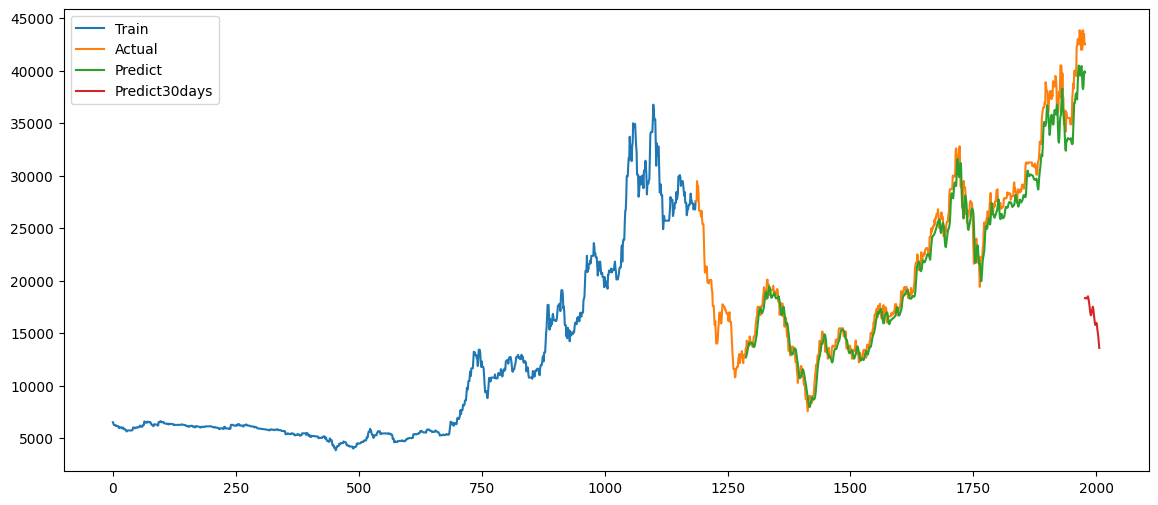

In [ ]:
# 14.Vẽ hình 30 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_30_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30_days, scaler.inverse_transform(lst_output_30_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict30days'])
plt.show()


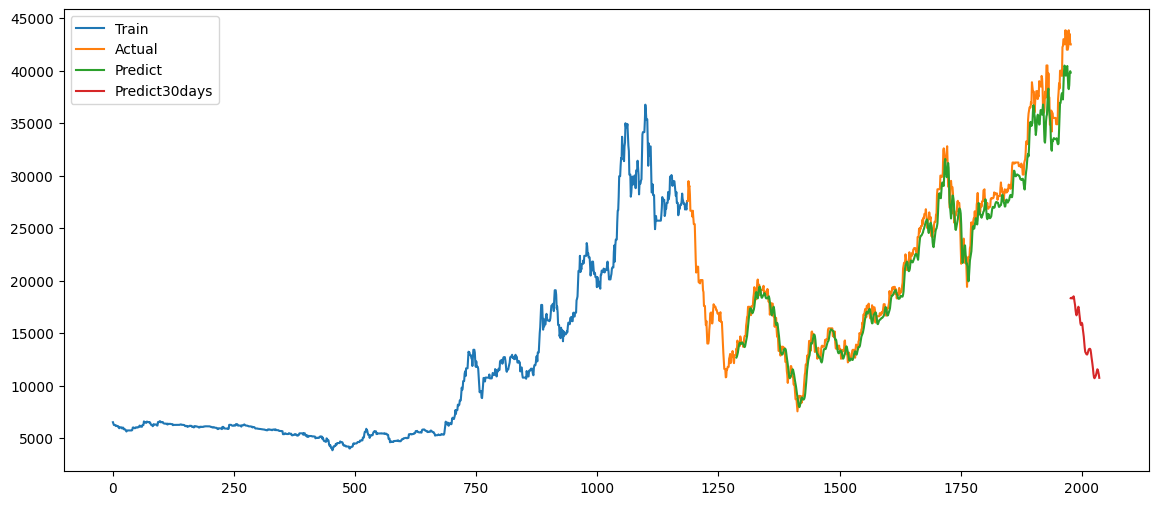

In [ ]:
# 14.Vẽ hình 60 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_60_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60_days, scaler.inverse_transform(lst_output_60_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict30days'])
plt.show()

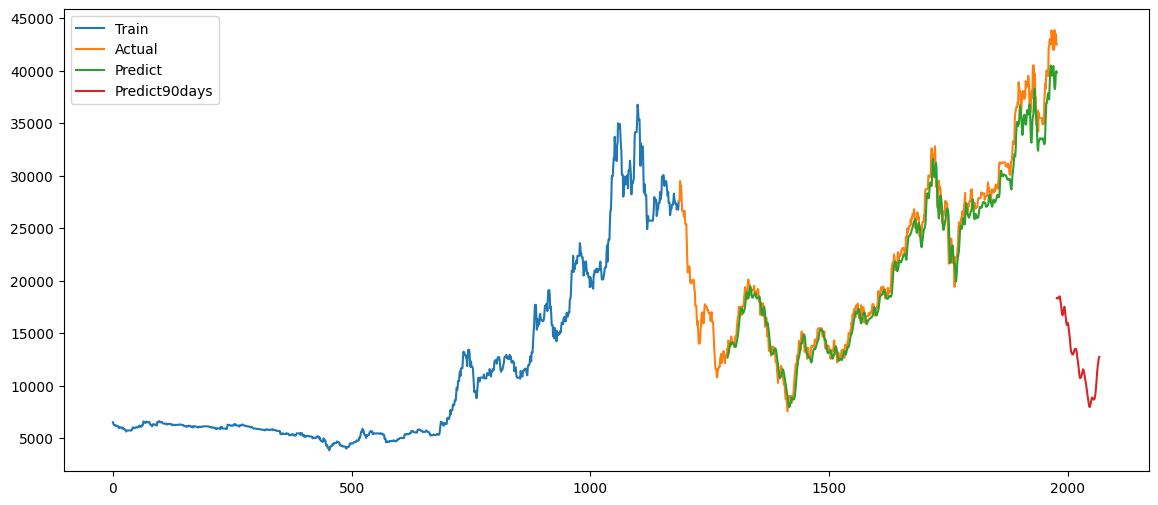

In [ ]:
# 14.Vẽ hình 90 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_90_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90_days, scaler.inverse_transform(lst_output_90_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict90days'])
plt.show()

# ACB

In [67]:
# 2. Đọc file csv và gắng index với giá Close
df2= pd.read_csv('DataACB.csv')
df_ACB=df2.reset_index()['Price']

In [68]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_ACB=scaler.fit_transform(np.array(df_ACB).reshape(-1,1))

In [69]:
df_ACB

array([[0.10626062],
       [0.08697082],
       [0.09048058],
       ...,
       [0.77797739],
       [0.7356102 ],
       [0.7356102 ]])

In [70]:
# 4. Chia train test
train_size = int(len(df_ACB) * 0.6)
test_size = len(df_ACB) - train_size
train_data, test_data = df_ACB[0:train_size, :], df_ACB[train_size:len(df_ACB), :1]


In [71]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [72]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [73]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [74]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 9s 165ms/step - loss: 0.0565
Epoch 2/100
17/17 [==============================] - 3s 167ms/step - loss: 0.0045
Epoch 3/100
17/17 [==============================] - 5s 265ms/step - loss: 0.0016
Epoch 4/100
17/17 [==============================] - 3s 167ms/step - loss: 0.0013
Epoch 5/100
17/17 [==============================] - 3s 164ms/step - loss: 0.0013
Epoch 6/100
17/17 [==============================] - 3s 164ms/step - loss: 0.0012
Epoch 7/100
17/17 [==============================] - 3s 201ms/step - loss: 0.0013
Epoch 8/100
17/17 [==============================] - 4s 212ms/step - loss: 0.0012
Epoch 9/100
17/17 [==============================] - 3s 164ms/step - loss: 0.0013
Epoch 10/100
17/17 [==============================] - 3s 162ms/step - loss: 0.0012
Epoch 11/100
17/17 [==============================] - 3s 164ms/step - loss: 0.0013
Epoch 12/100
17/17 [==============================] - 4s 268ms/step - loss: 0.0012
Epoch 13/100


In [49]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

22/22 [==============================] - 1s 61ms/step


In [50]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

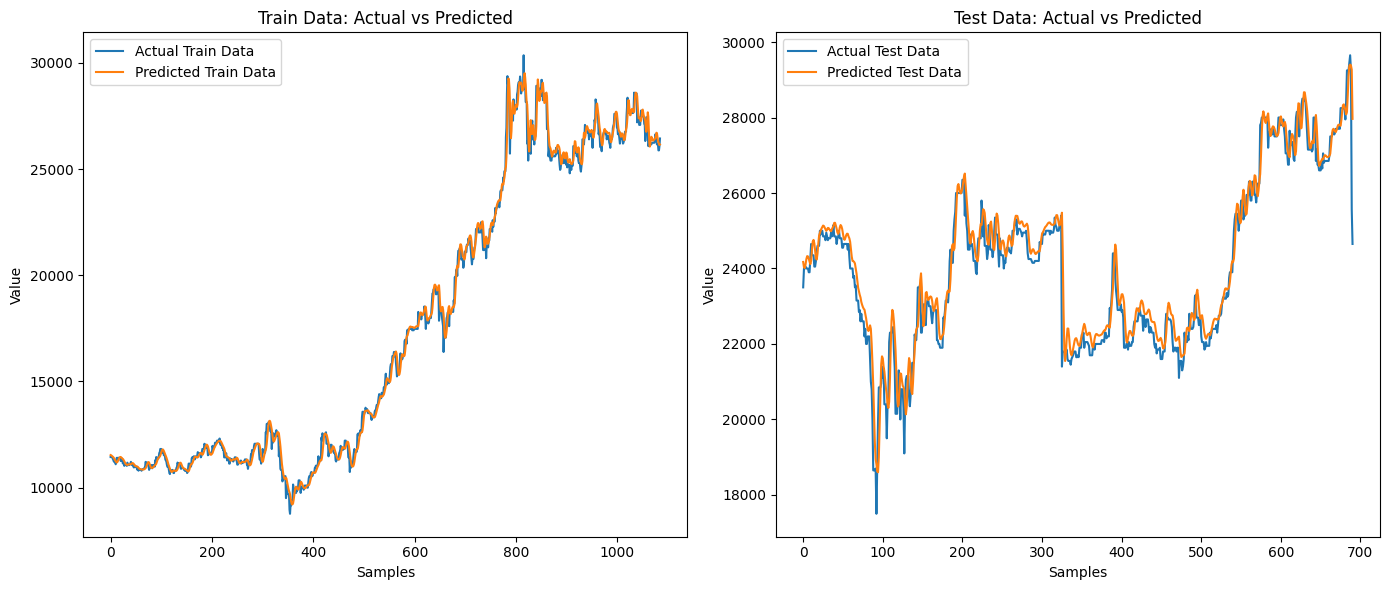

In [51]:
# Vẽ giá trị dự đoán và giá trị thực tế cho tập kiểm tra
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train_actual, label='Actual Train Data')
plt.plot(train_predict, label='Predicted Train Data')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label='Actual Test Data')
plt.plot(y_pred, label='Predicted Test Data')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [52]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test_actual)**2))
print('Testing RMSE:', test_rmse)

mape = mean_absolute_percentage_error(y_test_actual, y_pred)
print(f'Testing MAPE: {mape}')

mae = mean_absolute_error(y_test_actual, y_pred)
print(f'Testing MAE: {mae}')

Testing RMSE: 525.8971664010392
Testing MAPE: 0.015558950380604269
Testing MAE: 361.6161473408105


In [53]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_30_days=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_30_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_30_days.extend(yhat.tolist())
        i=i+1

0 day input [0.76802226 0.76570712 0.76570712 0.76570712 0.76570712 0.74950109
 0.78422829 0.78654344 0.76107682 0.76107682 0.76107682 0.700883
 0.71014359 0.68699211 0.71014359 0.66384064 0.66384064 0.66384064
 0.65458006 0.65921035 0.69393756 0.69393756 0.6962527  0.6962527
 0.6962527  0.70319814 0.72866476 0.71477388 0.70551329 0.70782844
 0.70782844 0.70782844 0.71708903 0.72634961 0.71477388 0.71245873
 0.70551329 0.70551329 0.70551329 0.68236182 0.70551329 0.70551329
 0.70782844 0.70551329 0.70551329 0.70551329 0.700883   0.700883
 0.71940417 0.7356102  0.72171932 0.72171932 0.72171932 0.70782844
 0.70782844 0.71477388 0.72634961 0.73329506 0.73329506 0.73329506
 0.75181623 0.74718594 0.74950109 0.75181623 0.74487079 0.74487079
 0.74487079 0.7402405  0.74950109 0.74487079 0.7402405  0.74255564
 0.74255564 0.74255564 0.74950109 0.74487079 0.74950109 0.75876167
 0.74487079 0.74487079 0.74487079 0.7356102  0.74255564 0.74487079
 0.75181623 0.74255564 0.74255564 0.74255564 0.73097991

In [54]:
#14. Dự đoán 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60_days=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60_days.extend(yhat.tolist())
        i=i+1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 0.71940417 0.72866476 0.75181623 0.76802226 0.74718594 0.74718594
 0.74718594 0.72866476 0.70782844 0.74255564 0.72403447 0.72171932
 0.72171932 0.72171932 0.70551329 0.71477388 0.71245873 0.72866476
 0.73097991 0.73097991 0.73097991 0.72634961 0.72634961 0.72403447
 0.73329506 0.75181623 0.75181623 0.75181623 0.76339197 0.75876167
 0.76570712 0.74718594 0.75413138 0.75413138 0.75413138 0.75181623
 0.74950109 0.74487079 0.74950109 0.74950109 0.74950109 0.74950109
 0.75181623 0.7402405  0.72403447 0.71708903 0.71708903 0.71708903
 0.71708903 0.71477388 0.71245873 0.71245873 0.71245873 0.71477388
 0.71477388 0.71477388 0.71477388 0.71477388 0.71477388 0.73792535
 0.7356102  0.7356102  0.7356102  0.74950109 0.74718594 0.74718594
 0.74718594 0.75181623 0.75181623 0.75181623 0.75181623 0.75181623
 0.74718594 0.75181623 0.74950109 0.74950109 0.74950109 0.75413138
 0.76802226 0.75876167 0.75644653 0.75181623 0.75181623 0.75181623
 0.75

In [ ]:
#14. Dự đoán 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90_days=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90_days.extend(yhat.tolist())
        i=i+1

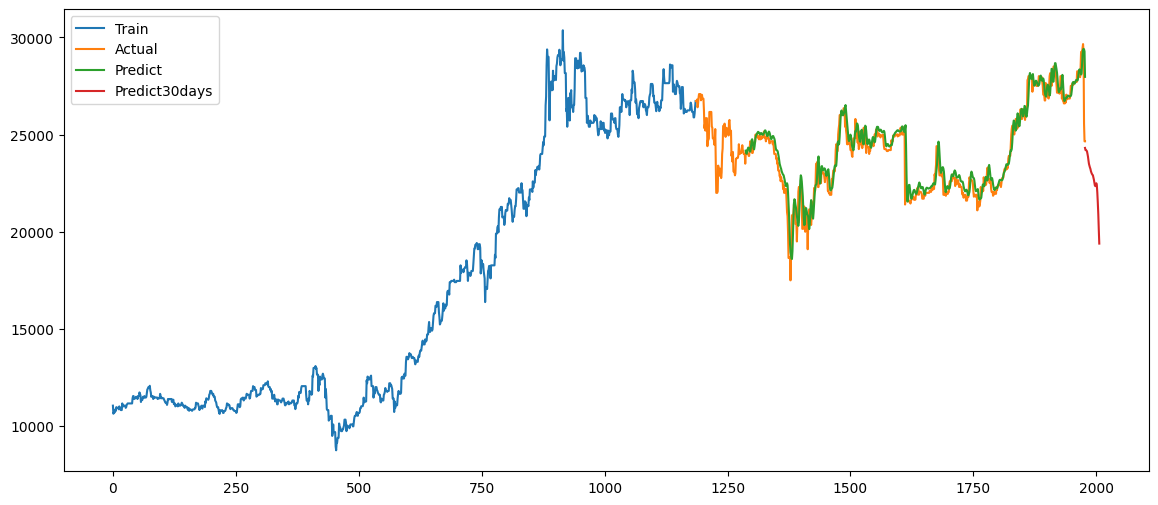

In [76]:
# 14.Vẽ hình 30 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_30_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30_days, scaler.inverse_transform(lst_output_30_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict30days'])
plt.show()


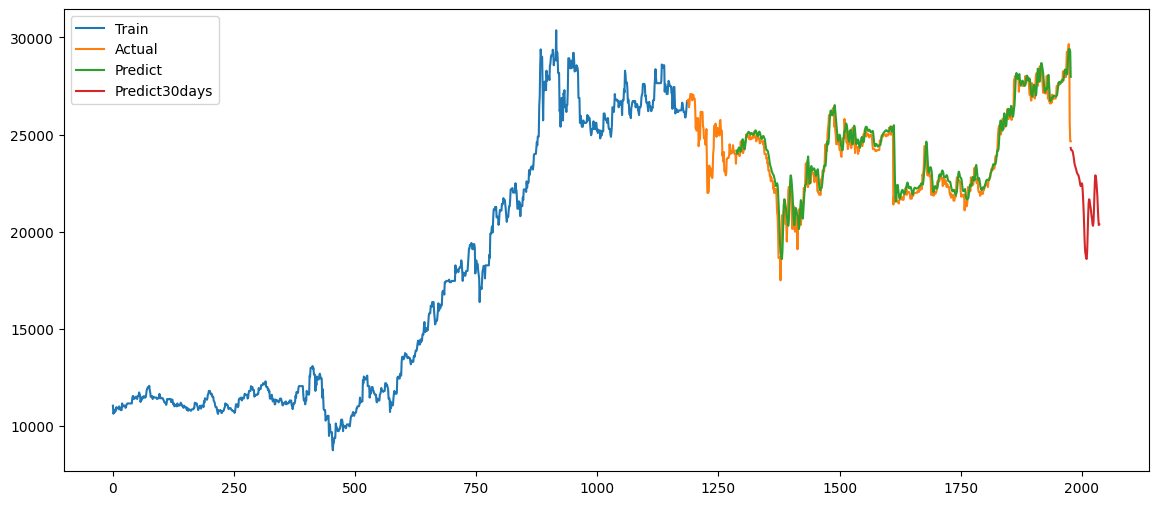

In [77]:
# 14.Vẽ hình 60 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_60_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60_days, scaler.inverse_transform(lst_output_60_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict30days'])
plt.show()

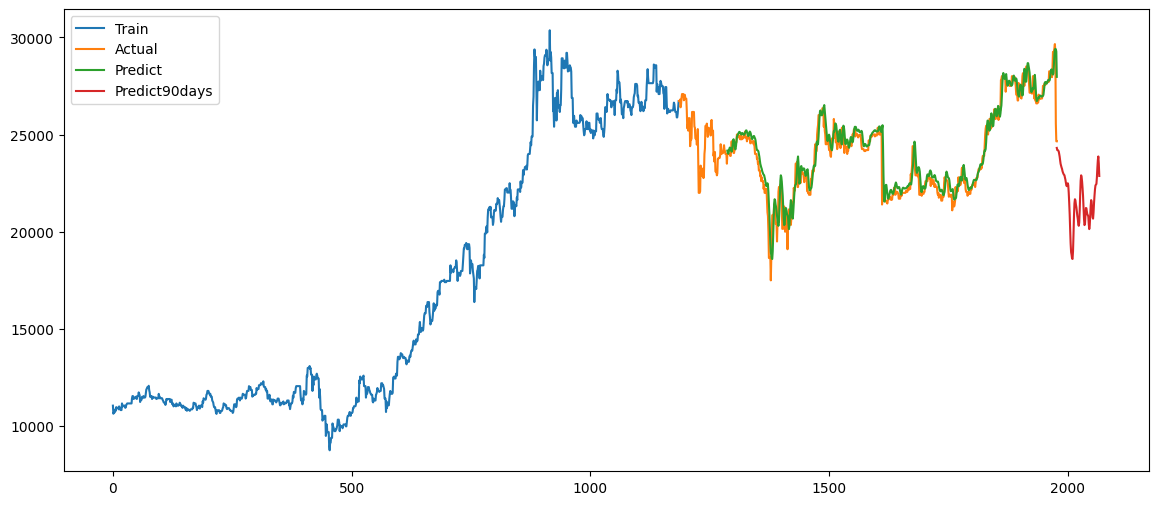

In [75]:
# 14.Vẽ hình 90 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_90_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90_days, scaler.inverse_transform(lst_output_90_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict90days'])
plt.show()

# SBS

In [78]:
# 2. Đọc file csv và gắng index với giá Close
df3= pd.read_csv('DataSBS.csv')
df_SBS=df3.reset_index()['Price']

In [79]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_SBS=scaler.fit_transform(np.array(df_SBS).reshape(-1,1))

In [80]:
df_SBS

array([[0.03960396],
       [0.03465347],
       [0.03465347],
       ...,
       [0.29207921],
       [0.29207921],
       [0.29207921]])

In [81]:
# 4. Chia train test
train_size = int(len(df_SBS) * 0.6)
test_size = len(df_SBS) - train_size
train_data, test_data = df_SBS[0:train_size, :], df_SBS[train_size:len(df_SBS), :1]


In [82]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [84]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [85]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [86]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 11s 239ms/step - loss: 0.0476
Epoch 2/100
17/17 [==============================] - 3s 159ms/step - loss: 0.0045
Epoch 3/100
17/17 [==============================] - 3s 190ms/step - loss: 0.0023
Epoch 4/100
17/17 [==============================] - 3s 163ms/step - loss: 0.0021
Epoch 5/100
17/17 [==============================] - 4s 246ms/step - loss: 0.0019
Epoch 6/100
17/17 [==============================] - 3s 173ms/step - loss: 0.0018
Epoch 7/100
17/17 [==============================] - 3s 157ms/step - loss: 0.0018
Epoch 8/100
17/17 [==============================] - 3s 160ms/step - loss: 0.0018
Epoch 9/100
17/17 [==============================] - 3s 180ms/step - loss: 0.0016
Epoch 10/100
17/17 [==============================] - 4s 227ms/step - loss: 0.0016
Epoch 11/100
17/17 [==============================] - 3s 161ms/step - loss: 0.0015
Epoch 12/100
17/17 [==============================] - 3s 162ms/step - loss: 0.0015
Epoch 13/100

In [87]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

22/22 [==============================] - 1s 38ms/step


In [88]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

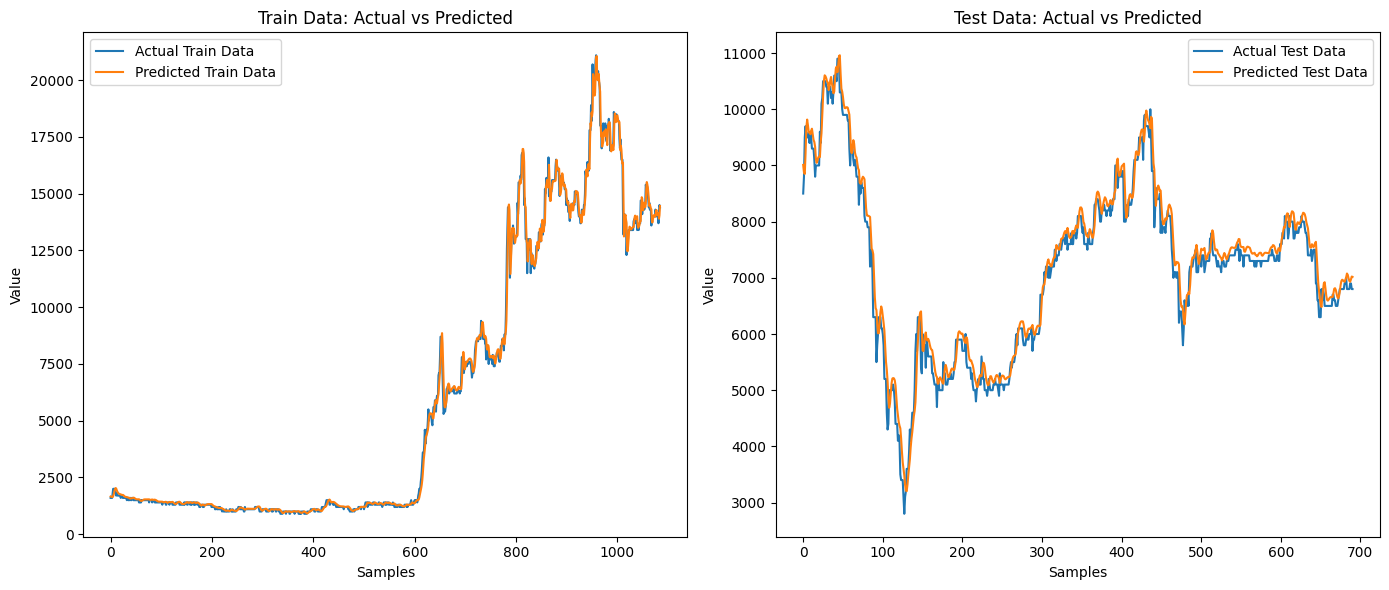

In [89]:
# Vẽ giá trị dự đoán và giá trị thực tế cho tập kiểm tra
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train_actual, label='Actual Train Data')
plt.plot(train_predict, label='Predicted Train Data')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label='Actual Test Data')
plt.plot(y_pred, label='Predicted Test Data')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test_actual)**2))
print('Testing RMSE:', test_rmse)

mape = mean_absolute_percentage_error(y_test_actual, y_pred)
print(f'Testing MAPE: {mape}')

mae = mean_absolute_error(y_test_actual, y_pred)
print(f'Testing MAE: {mae}')

Testing RMSE: 272.0429162895115
Testing MAPE: 0.03151045203270395
Testing MAE: 205.0711590426012


In [91]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_30_days=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_30_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_30_days.extend(yhat.tolist())
        i=i+1

0 day input [0.4009901  0.4009901  0.4009901  0.4009901  0.47029703 0.52970297
 0.52475248 0.51980198 0.52475248 0.52475248 0.52475248 0.47029703
 0.45049505 0.41584158 0.41584158 0.35643564 0.35643564 0.35643564
 0.32178218 0.34158416 0.35643564 0.36138614 0.36633663 0.36633663
 0.36633663 0.39108911 0.38613861 0.3960396  0.38118812 0.4009901
 0.4009901  0.4009901  0.40594059 0.3960396  0.37623762 0.38118812
 0.39108911 0.39108911 0.39108911 0.37623762 0.39108911 0.42574257
 0.43564356 0.42574257 0.42574257 0.42574257 0.43069307 0.42079208
 0.43069307 0.42574257 0.41584158 0.41584158 0.41584158 0.40594059
 0.39108911 0.4009901  0.4009901  0.4009901  0.4009901  0.4009901
 0.43069307 0.42079208 0.45544554 0.46039604 0.47524752 0.47524752
 0.47524752 0.47524752 0.47029703 0.47029703 0.45544554 0.47029703
 0.47029703 0.47029703 0.46039604 0.46534653 0.45544554 0.46534653
 0.48019802 0.48019802 0.48019802 0.47524752 0.4950495  0.4950495
 0.49009901 0.46534653 0.46534653 0.46534653 0.450495

In [92]:
#14. Dự đoán 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60_days=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60_days.extend(yhat.tolist())
        i=i+1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 0.2029703  0.20792079 0.20792079 0.21287129 0.20792079 0.20792079
 0.20792079 0.2029703  0.1980198  0.21782178 0.20792079 0.20792079
 0.20792079 0.20792079 0.2029703  0.20792079 0.20792079 0.20792079
 0.20792079 0.20792079 0.20792079 0.21287129 0.22277228 0.22772277
 0.22277228 0.22772277 0.22772277 0.22772277 0.23267327 0.24752475
 0.25247525 0.24257426 0.25742574 0.25742574 0.25742574 0.25742574
 0.25742574 0.25742574 0.24752475 0.24257426 0.24257426 0.24257426
 0.24752475 0.25247525 0.24752475 0.24752475 0.25247525 0.25247525
 0.25247525 0.25742574 0.23762376 0.24752475 0.24752475 0.25247525
 0.25247525 0.25247525 0.25247525 0.25247525 0.25247525 0.25742574
 0.28712871 0.28712871 0.28712871 0.28712871 0.29207921 0.30693069
 0.3019802  0.31188119 0.31188119 0.31188119 0.3019802  0.31188119
 0.3019802  0.30693069 0.31188119 0.31188119 0.31188119 0.31188119
 0.32673267 0.32673267 0.31683168 0.32178218 0.32178218 0.32178218
 0.33

In [93]:
#14. Dự đoán 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90_days=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input_trimmed = x_input[:100]
        x_input = x_input_trimmed.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90_days.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90_days.extend(yhat.tolist())
        i=i+1

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 0.25247525 0.24257426 0.25742574 0.25742574 0.25742574 0.25742574
 0.25742574 0.25742574 0.24752475 0.24257426 0.24257426 0.24257426
 0.24752475 0.25247525 0.24752475 0.24752475 0.25247525 0.25247525
 0.25247525 0.25742574 0.23762376 0.24752475 0.24752475 0.25247525
 0.25247525 0.25247525 0.25247525 0.25247525 0.25247525 0.25742574
 0.28712871 0.28712871 0.28712871 0.28712871 0.29207921 0.30693069
 0.3019802  0.31188119 0.31188119 0.31188119 0.3019802  0.31188119
 0.3019802  0.30693069 0.31188119 0.31188119 0.31188119 0.31188119
 0.32673267 0.32673267 0.31683168 0.32178218 0.32178218 0.32178218
 0.33168317 0.33168317 0.32673267 0.33168317 0.33663366 0.33663366
 0.33663366 0.33168317 0.34158416 0.34158416 0.32673267 0.33168317
 0.33168317 0.33168317 0.33168317 0.34158416 0.33168317 0.33168317
 0.34158416 0.34158416 0.34158416 0.33663366 0.34158416 0.35643564
 0.35643564 0.35643564 0.35643564 0.35643564 0.34653465 0.34158416
 0.34

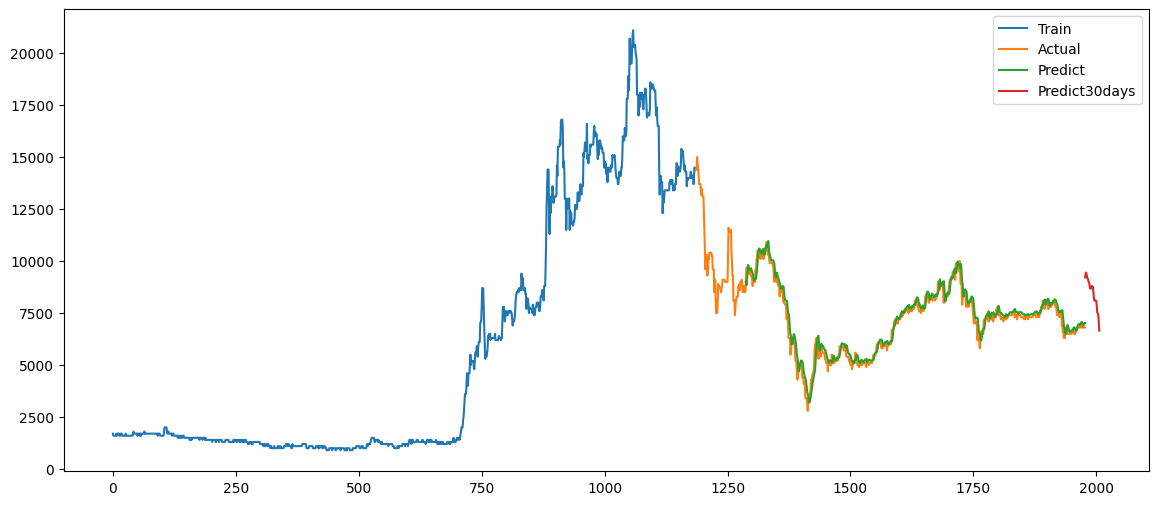

In [94]:
# 14.Vẽ hình 30 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_30_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30_days, scaler.inverse_transform(lst_output_30_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict30days'])
plt.show()


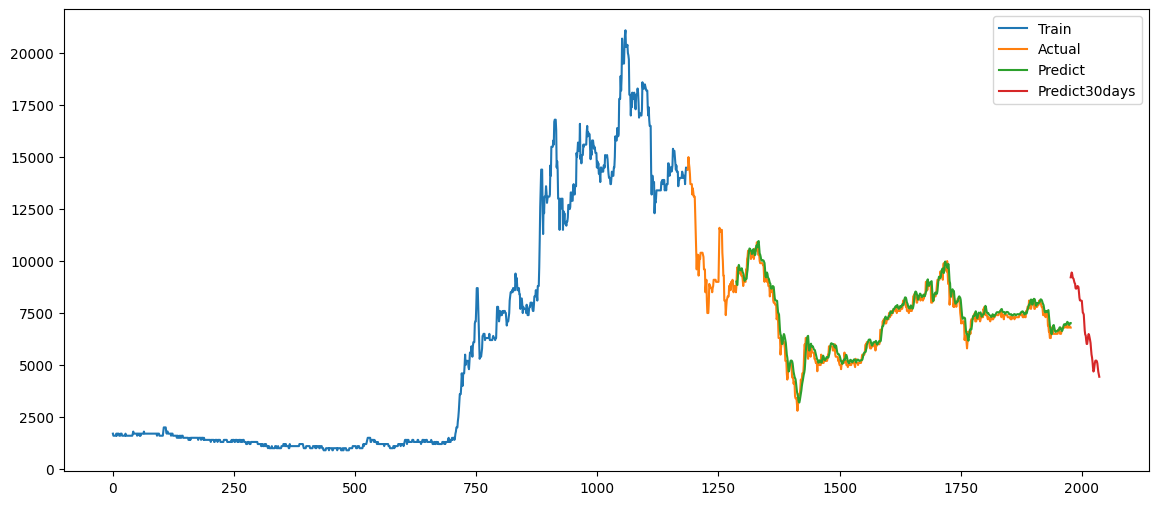

In [95]:
# 14.Vẽ hình 60 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_60_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60_days, scaler.inverse_transform(lst_output_60_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict30days'])
plt.show()

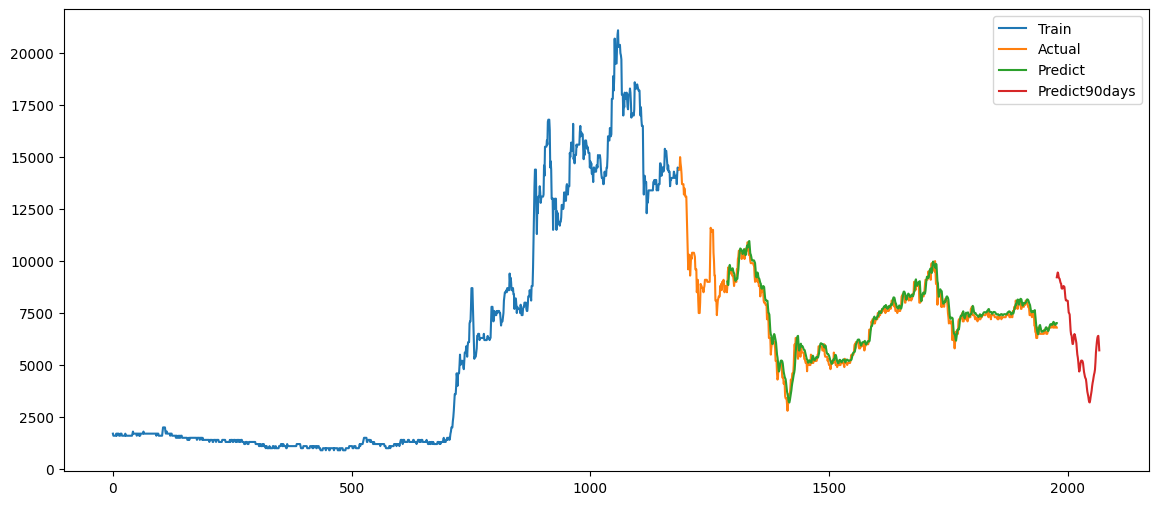

In [96]:
# 14.Vẽ hình 90 days
plt.figure(figsize=(14, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

predict_data_index_90_days = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90_days, scaler.inverse_transform(lst_output_90_days))

plt.legend(['Train', 'Actual', 'Predict', 'Predict90days'])
plt.show()